# SQLite Engine - Exploratory Data Analysis

In [2]:
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine, text, inspect
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Define the database file path
DATABASE_FILE = "classicmodels.sqlite"
# Create the SQLAlchemy engine for the SQLite file
engine = create_engine(f"sqlite:///../data/{DATABASE_FILE}")

In [ ]:
# --- Helper Function for Querying and Displaying Data ---
def run_query(sql_query, connection):
    """Executes an SQL query and returns the results as a pandas DataFrame."""
    try:
        # Execute the query
        result = connection.execute(text(sql_query))
        
        # Get column names
        columns = result.keys()
        
        # Fetch all results
        data = result.fetchall()
        
        # Convert to DataFrame for easy viewing
        df = pd.DataFrame(data, columns=columns)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

## EDA Steps

In [9]:
# Establish a connection to the database
connection = engine.connect()

In [10]:
## 1.1 List all tables
print("## 1.1 Tables in the Database 🏛️")
inspector = inspect(engine)
table_names = inspector.get_table_names()
print(table_names)
print("\n" + "="*50 + "\n")

## 1.1 Tables in the Database 🏛️
['customers', 'employees', 'offices', 'orderdetails', 'orders', 'payments', 'productlines', 'products']




In [11]:
## 1.2 Explore a key table: 'customers'

print("## 1.2 First 5 Rows of 'customers' table 👤")
customers_query = "SELECT * FROM customers LIMIT 5;"
df_customers_head = run_query(customers_query, connection)
print(df_customers_head.head())
print("\n" + "="*50 + "\n")

print("## 1.3 Count of Customers by Country 🌍 (Top 10)")
# A more advanced query: GROUP BY and ORDER BY
country_count_query = """
SELECT 
    country, 
    COUNT(customerNumber) AS customer_count
FROM 
    customers
GROUP BY 
    country
ORDER BY 
    customer_count DESC
LIMIT 10;
"""
df_country_counts = run_query(country_count_query, connection)
print(df_country_counts)

## 1.2 First 5 Rows of 'customers' table 👤
   customerNumber                customerName contactLastName  \
0             103           Atelier graphique         Schmitt   
1             112          Signal Gift Stores            King   
2             114  Australian Collectors, Co.        Ferguson   
3             119           La Rochelle Gifts         Labrune   
4             121          Baane Mini Imports      Bergulfsen   

  contactFirstName         phone                  addressLine1 addressLine2  \
0          Carine     40.32.2555                54, rue Royale         None   
1             Jean    7025551838               8489 Strong St.         None   
2            Peter  03 9520 4555             636 St Kilda Road      Level 3   
3          Janine     40.67.8555  67, rue des Cinquante Otages         None   
4           Jonas     07-98 9555        Erling Skakkes gate 78         None   

        city     state postalCode    country  salesRepEmployeeNumber  \
0     Nantes      N

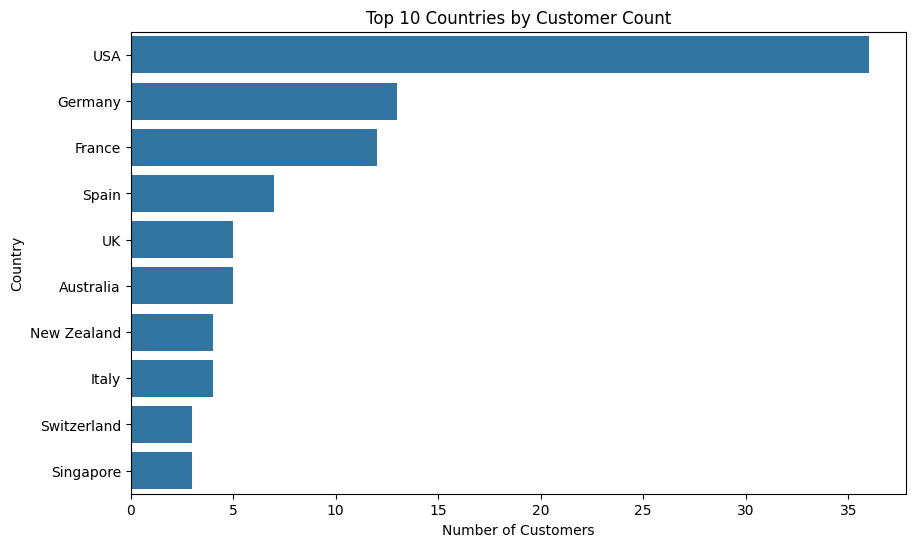

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_count', y='country', data=df_country_counts)
plt.title('Top 10 Countries by Customer Count')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()
print("\n" + "="*50 + "\n")

In [13]:
## 1.4 Simple Aggregation on 'products' table

print("## 1.4 Product Price Analysis 💲")
# Using SQL aggregate functions: AVG, MIN, MAX
price_stats_query = """
SELECT 
    AVG(MSRP) AS Avg_MSRP, 
    MIN(MSRP) AS Min_MSRP, 
    MAX(MSRP) AS Max_MSRP,
    AVG(buyPrice) AS Avg_BuyPrice
FROM 
    products;
"""
df_price_stats = run_query(price_stats_query, connection)
print(df_price_stats)
print("\n" + "="*50 + "\n")

## 1.4 Product Price Analysis 💲
     Avg_MSRP  Min_MSRP  Max_MSRP  Avg_BuyPrice
0  100.438727     33.19     214.3     54.395182




## 1.5 Top 5 Products by Total Quantity Ordered 📦
                               productName  TotalQuantitySold
0              1992 Ferrari 360 Spider red               1808
1                     1937 Lincoln Berline               1111
2                American Airlines: MD-11S               1085
3  1941 Chevrolet Special Deluxe Cabriolet               1076
4             1930 Buick Marquette Phaeton               1074


C:\Users\jbarcc\AppData\Local\Temp\ipykernel_50976\3935349769.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalQuantitySold', y='productName', data=df_top_products, palette='viridis')


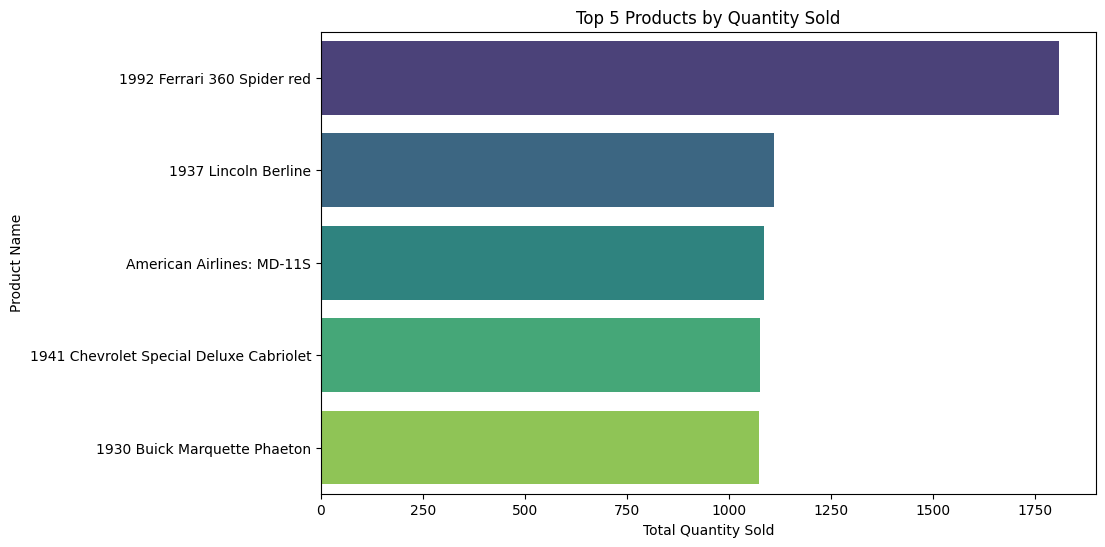

In [14]:
## 1.5 Join Query for Sales Performance

print("## 1.5 Top 5 Products by Total Quantity Ordered 📦")
# Joining 'products' and 'orderdetails' tables
top_products_query = """
SELECT
    p.productName,
    SUM(od.quantityOrdered) AS TotalQuantitySold
FROM
    products p
JOIN
    orderdetails od ON p.productCode = od.productCode
GROUP BY
    p.productName
ORDER BY
    TotalQuantitySold DESC
LIMIT 5;
"""
df_top_products = run_query(top_products_query, connection)
print(df_top_products)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalQuantitySold', y='productName', data=df_top_products, palette='viridis')
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Connection is automatically closed when exiting the 'with' block

In [18]:
# Close the connection
engine.dispose()
print('Connection closed')

Connection closed
